# <font color = 'pickle'>**Import/Install the packages**

In [ ]:
if 'google.colab' in str(get_ipython()):
    print('Running on Colab')
else:
    print('Not Running on Colab')

Running on Colab


In [ ]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade feature_engine scikit-learn -q

     |████████████████████████████████| 276 kB 5.2 MB/s 


In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import feature_engine

In [ ]:
print(feature_engine.__version__)

1.4.0


In [ ]:
import sklearn

In [ ]:
print(sklearn.__version__)

1.0.2


In [ ]:
"""Importing the required packages"""

# For DataFrames and manipulations
import pandas as pd
import numpy as np

# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

from scipy.stats import uniform, truncnorm, randint, loguniform

# drop arbitrary features
from feature_engine.selection import DropFeatures
# For categorical variables
from feature_engine.encoding import OneHotEncoder
# Missing value imputation
from feature_engine.imputation import MeanMedianImputer
# add missing indicator 
from feature_engine.imputation import AddMissingIndicator
# categorical imputer
from feature_engine.imputation import CategoricalImputer
# random sample imputer
from feature_engine.imputation import RandomSampleImputer
# feature engine wrapper 
from feature_engine.wrappers import SklearnTransformerWrapper


# For splitting the dataset
from sklearn.model_selection import train_test_split

# Using Support Vector Machines as models
from sklearn.tree import DecisionTreeClassifier

# creating pipelines 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# draws a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# save and load models
import joblib

# Pathlib to navigate file system
from pathlib import Path
import sys

# <font color = 'pickle'> **Specify Project Folder Location**

In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
if 'google.colab' in str(get_ipython()):
    base_folder = Path('/content/drive/MyDrive/data/')
else:
    base_folder = Path('/home/harpreet/Insync/google_drive_shaannoor/data/')

In [ ]:
data_folder = base_folder/'datasets'
save_model_folder = base_folder/'models/ml_fall_2022'
custom_function_folder = base_folder/'custom-functions'
save_model_folder.mkdir(exist_ok=True, parents=True)

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
sys.path.append(str(custom_function_folder))

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/data/custom-functions']

In [ ]:
from  plot_learning_curve import plot_learning_curve

In [ ]:
from eda_plots import diagnostic_plots, plot_target_by_category

# <font color = 'pickle'>**Import the dataset**
Next, we will create variables to store paths where the data exists and where we will save the model. 

Now, we will create a variable to store the specific data file path from the data source folder.

In [ ]:
file = data_folder / 'modified_churn.csv'

Now, we will create a data-frame using the above file path and Pandas....  

In [ ]:
df = pd.read_csv(file)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4074 non-null   int64  
 1   RowNumber        4074 non-null   int64  
 2   CustomerId       4074 non-null   int64  
 3   Surname          4074 non-null   object 
 4   CreditScore      4074 non-null   int64  
 5   Geography        3585 non-null   object 
 6   Gender           4033 non-null   object 
 7   Age              3543 non-null   float64
 8   Tenure           4072 non-null   float64
 9   Balance          4067 non-null   float64
 10  NumOfProducts    4070 non-null   float64
 11  HasCrCard        4074 non-null   int64  
 12  IsActiveMember   4074 non-null   int64  
 13  EstimatedSalary  4074 non-null   float64
 14  Exited           4074 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 477.5+ KB


# <font color = 'pickle'>**Split Data into Train/Test set**

In [ ]:
# before doing any data cleaning step we need to first split the data into train/test
X = df.drop(['Exited'], axis =1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=0, stratify =y)

In [ ]:
# before doing any data cleaning step we need to first split the data into train/test
X = df.drop(['Exited'], axis =1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify =y)

# <font color = 'pickle'>**Complete Pipeline**

We will need to modify the pre-processing steps we have been using. 
- Trees really don't care about the scale and distribution of the data. 
- Hence we will not need to do descertization of balance and credit variables. 
- Futher , we do not need to do log transformatiomn of Age. 
- Tree based models are not affected by outliers as well. So we do not need to do the winsorizer step. 
- So basically, we need to do missing value imputations followed by encoding of categorical varibles.

**NOTE :Some tree based models can also work with missing values. Futher they can take categorical variables directly without one hot encoding. However, these implementations are not yet availible im sklearn. Hence we will need to do missing value imputation follwed by one hot encoding of categorical variables.**


In [ ]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname','Unnamed: 0']

churn_pipeline_dtree = Pipeline([
                           
    ('drop_features',
      DropFeatures(columns_to_drop)),

    ('imputer_median',
      MeanMedianImputer(imputation_method='median', variables=['Age', 'Balance', 'NumOfProducts'])),

    ('imputer_catgorical_frequent',
      CategoricalImputer(imputation_method = 'frequent', variables=['Gender','Geography'])),

      ('imputer_missing_indicator',
      AddMissingIndicator(variables=['Age', 'Geography'])),

    ('imputer_random_sample',
      RandomSampleImputer(random_state=123, variables=['Tenure'])),
    
    ('one_hot_encoder',
      OneHotEncoder(variables=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
                   , drop_last= True, ignore_format=True)),

   
    ('dtree',
     DecisionTreeClassifier(random_state=0))
])

In [ ]:
from sklearn import set_config

set_config(display='diagram')
churn_pipeline_dtree

Pipeline(steps=[('drop_features',
                 DropFeatures(features_to_drop=['RowNumber', 'CustomerId',
                                                'Surname', 'Unnamed: 0'])),
                ('imputer_median',
                 MeanMedianImputer(variables=['Age', 'Balance',
                                              'NumOfProducts'])),
                ('imputer_catgorical_frequent',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['Gender', 'Geography'])),
                ('imputer_missing_indicator',
                 AddMissingIndicator(variables=['Age', 'Geography'])),
                ('imputer_random_sample',
                 RandomSampleImputer(random_state=123, variables=['Tenure'])),
                ('one_hot_encoder',
                 OneHotEncoder(drop_last=True, ignore_format=True,
                               variables=['Geography', 'Gender', 'HasCrCard',
                                          'IsActiveMember'])),
                ('dtree', DecisionTreeClassifier(random_state=0))])

## <font color = 'pickle'>**Hyperparameter Tuning - Round 1**

For Decision trees, there are two ways of controlling for overfitting:

Method 1: Prepruning: Example of importnat hyperparameters that you can use for pre-pruning are:

    (1) max_depth (The maximum depth of the tree)
    (2) max_leaf_nodes, 
    (3) min_samples_splits (The minimum number of samples required to split an internal nod)
    (4) min_impurity_decrease
    (5) min_samples_leaf (The minimum number of samples required to be at a leaf node)
    (6) max_features
    

- If there is overfitting, we should decrease 1, 2 and increase 3, 4 and 5.
- Max depth can sometimes split a single point which might not give very good predictions.
- However, since we are limitng the depth everywhere in tree - the inference will be fast and it will take lesser   memory.
- Max depth is usually good for ensemble models where we have to built a lot of trees.
- Min_sample_splits can also lead to leaf nodes with smaller observations
- If we want to avoid leaf nodes with very small observations, we can use max_leaf_nodes, min_sample_leaf, min_impurity_decrease

- We can use any one of them or pick few of these and tune them simulatneously.

- max features can also reduce overfitting. It is also useful when the dataset has very large number of variables.


Post-pruning:
- In sklearn, we can use ccp_alpha to control post prunning. Greater values of ccp_alpha increase the number of nodes pruned and hence decrease over-fitting.


In round 1 we will start with tuning max_depth and min_samples_leaf. For decision trees, we can always get 100 % accuracy on training data (each leaf node has only 1 observations). We will not try to overfit first. Also since we are tuning only two parametrs , we will use GridSerach (we do not have lot of options in search space).

### <font color = 'pickle'>**Specify Param Grid**

In [ ]:
# now we create the grid with all the parameters that we would like to test

param_grid_1 = {
    'dtree__max_depth': np.arange(4,20),
    'dtree__min_samples_leaf': np.arange(4,40)
    
     }
# now we set up the grid search with cross-validation
grid_dtree_1 = GridSearchCV(churn_pipeline_dtree, param_grid_1,
                           cv=5, return_train_score= True, n_jobs=-1)

### <font color = 'pickle'>**Fit Model**

In [ ]:
grid_dtree_1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['RowNumber',
                                                                       'CustomerId',
                                                                       'Surname',
                                                                       'Unnamed: '
                                                                       '0'])),
                                       ('imputer_median',
                                        MeanMedianImputer(variables=['Age',
                                                                     'Balance',
                                                                     'NumOfProducts'])),
                                       ('imputer_catgorical_frequent',
                                        CategoricalImputer(imputation_method='frequent',
                                                           variables=['Gender',
                                                                      'Geography'])),
                                       ('imputer_...
                                                      variables=['Geography',
                                                                 'Gender',
                                                                 'HasCrCard',
                                                                 'IsActiveMember'])),
                                       ('dtree',
                                        DecisionTreeClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'dtree__max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'dtree__min_samples_leaf': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39])},
             return_train_score=True)

### <font color = 'pickle'>**Get Best Params**

In [ ]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_dtree_1.best_params_)

{'dtree__max_depth': 6, 'dtree__min_samples_leaf': 8}


### <font color = 'pickle'>**Save Model**

In [ ]:
file_best_estimator_round1 = save_model_folder / 'dtree_round1_best_estimator.pk'
file_complete_grid_round1 = save_model_folder / 'dtree_round1_complete_grid.pkl'

In [ ]:
joblib.dump(grid_dtree_1.best_estimator_, file_best_estimator_round1)
joblib.dump(grid_dtree_1, file_complete_grid_round1)

['/content/drive/MyDrive/data/models/ml_fall_2022/dtree_round1_complete_grid.pkl']

### <font color = 'pickle'>**Load Saved Model**

In [ ]:
loaded_best_estimator_round1 = joblib.load(file_best_estimator_round1)
loaded_complete_grid_round1 = joblib.load(file_complete_grid_round1)

### <font color = 'pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

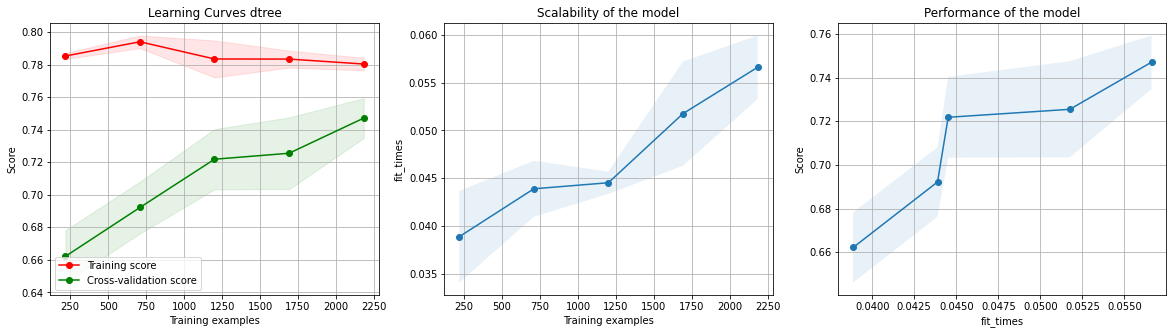

In [ ]:
plot_learning_curve(loaded_best_estimator_round1, 
                    'Learning Curves dtree',
                    X_train, y_train, n_jobs=-1)

The learning curves seems reasonable. There seems to be slight underfittig. However based on the best parameter and the range that we specified it does not seem we will gain much by futher tuning these parameters.

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [ ]:
#let's check the train scores
print(loaded_best_estimator_round1.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round1.best_score_)

0.7761084646390619
0.74715730752428


## <font color = 'pickle'>**Hyperparameter Tuning - Round 2**
In this round, we will try to fine tune, max leaf nodes and see of we can get better results.

### <font color = 'pickle'>**Specify Param Grid**

In [ ]:
# now we create the grid with all the parameters that we would like to test.

param_grid_2= {
    'dtree__max_leaf_nodes': np.arange(4, 20),
    'dtree__min_samples_split': np.arange(2, 40)
    }

# now we set up the grid search with cross-validation
grid_dtree_2 = GridSearchCV(churn_pipeline_dtree, param_grid_2,
                           cv=5, return_train_score= True, n_jobs=-1)

### <font color = 'pickle'>**Fit Model**

In [ ]:
grid_dtree_2.fit(X_train,y_train)

### <font color = 'pickle'>**Get Best Params**

In [ ]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_dtree_2.best_params_)

{'dtree__max_leaf_nodes': 18, 'dtree__min_samples_split': 2}


### <font color = 'pickle'>**Save Model**

In [ ]:
file_best_estimator_round2 = save_model_folder / 'dtree_round2_params.pkl'
file_complete_grid_round2 = save_model_folder / 'dtree_round2_model.pkl'

In [ ]:
joblib.dump(grid_dtree_2.best_estimator_, file_best_estimator_round2)
joblib.dump(grid_dtree_2, file_complete_grid_round2)

['/content/drive/MyDrive/data/models/ml_fall_2022/dtree_round2_model.pkl']

### <font color = 'pickle'>**Load Saved Model**

In [ ]:
loaded_best_estimator_round2 = joblib.load(file_best_estimator_round2)
loaded_complete_grid_round2 = joblib.load(file_complete_grid_round2)

### <font color = 'pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

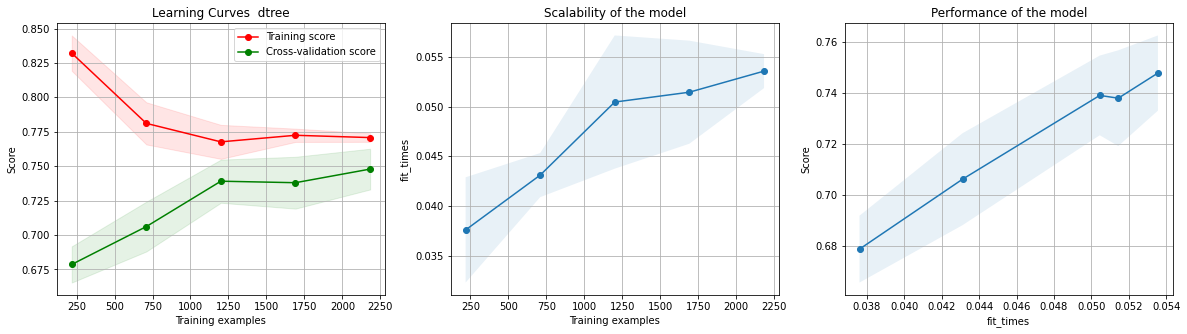

In [ ]:
plot_learning_curve(loaded_best_estimator_round2 , 
                    'Learning Curves  dtree',
                    X_train, y_train, n_jobs=-1)

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [ ]:
#let's check the train scores
print(loaded_best_estimator_round2.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round2.best_score_)

0.7709783803591059
0.7478946130322277


Max_leaf_nodes = 18 gives us the best results. Since we used gridserach to explore values between 4 and 20, we do not need to do any further tuning. It seems that results are slightly better than using max_depth. The cross validation errors are also very similar to round2.

## <font color = 'pickle'>**Post Prunning sklearn**

In [ ]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname','Unnamed: 0']

churn_pipeline_preprocessing = Pipeline([
                           
    ('drop_features',
      DropFeatures(columns_to_drop)),

    ('imputer_median',
      MeanMedianImputer(imputation_method='median', variables=['Age', 'Balance', 'NumOfProducts'])),

    ('imputer_catgorical_frequent',
      CategoricalImputer(imputation_method = 'frequent', variables=['Gender','Geography'])),

      ('imputer_missing_indicator',
      AddMissingIndicator(variables=['Age', 'Geography'])),

    ('imputer_random_sample',
      RandomSampleImputer(random_state=123, variables=['Tenure'])),
    
    ('one_hot_encoder',
      OneHotEncoder(variables=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
                   , drop_last= True, ignore_format=True)),

])

In [ ]:
X_train_preprocessed = churn_pipeline_preprocessing.fit_transform(X_train)

### <font color = 'pickle'>**Cost complexity pruning path**

In [ ]:
# cheating a bit to get a good grid:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train_preprocessed , y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total impurity vs relevant alpha for training set')

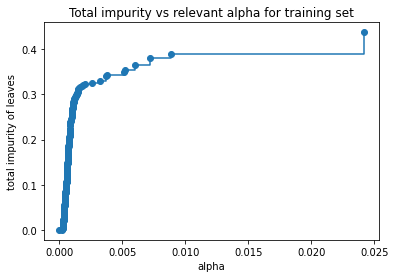

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total impurity vs relevant alpha for training set")

### <font color = 'pickle'>**Specify Param Grid**

In [ ]:
param_grid_3 = {'dtree__ccp_alpha': np.linspace(0., 0.025, 20)}

# now we set up the grid search with cross-validation
grid_dtree_3 = GridSearchCV(churn_pipeline_dtree, param_grid_3,
                           cv=5, return_train_score= True, n_jobs=-1)

### <font color = 'pickle'>**Fit Model**

In [ ]:
grid_dtree_3.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['RowNumber',
                                                                       'CustomerId',
                                                                       'Surname',
                                                                       'Unnamed: '
                                                                       '0'])),
                                       ('imputer_median',
                                        MeanMedianImputer(variables=['Age',
                                                                     'Balance',
                                                                     'NumOfProducts'])),
                                       ('imputer_catgorical_frequent',
                                        CategoricalImputer(imputation_method='frequent',
                                                           variables=['Gender',
                                                                      'Geography'])),
                                       ('imputer_...
                                                                 'IsActiveMember'])),
                                       ('dtree',
                                        DecisionTreeClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'dtree__ccp_alpha': array([0.        , 0.00131579, 0.00263158, 0.00394737, 0.00526316,
       0.00657895, 0.00789474, 0.00921053, 0.01052632, 0.01184211,
       0.01315789, 0.01447368, 0.01578947, 0.01710526, 0.01842105,
       0.01973684, 0.02105263, 0.02236842, 0.02368421, 0.025     ])},
             return_train_score=True)

### <font color = 'pickle'>**Get Best Params**

In [ ]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_dtree_3.best_params_)

{'dtree__ccp_alpha': 0.002631578947368421}


In [ ]:
np.linspace(0., 0.025, 20)

array([0.        , 0.00131579, 0.00263158, 0.00394737, 0.00526316,
       0.00657895, 0.00789474, 0.00921053, 0.01052632, 0.01184211,
       0.01315789, 0.01447368, 0.01578947, 0.01710526, 0.01842105,
       0.01973684, 0.02105263, 0.02236842, 0.02368421, 0.025     ])

### <font color = 'pickle'>**Refine Param Grid**

In [ ]:
param_grid_4 = {'dtree__ccp_alpha': np.linspace(0.001, 0.004, 20)}

# now we set up the grid search with cross-validation
grid_dtree_4 = GridSearchCV(churn_pipeline_dtree, param_grid_4,
                           cv=5, return_train_score= True, n_jobs=-1)

### <font color = 'pickle'>**ReFit Model**

In [ ]:
grid_dtree_4.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['RowNumber',
                                                                       'CustomerId',
                                                                       'Surname',
                                                                       'Unnamed: '
                                                                       '0'])),
                                       ('imputer_median',
                                        MeanMedianImputer(variables=['Age',
                                                                     'Balance',
                                                                     'NumOfProducts'])),
                                       ('imputer_catgorical_frequent',
                                        CategoricalImputer(imputation_method='frequent',
                                                           variables=['Gender',
                                                                      'Geography'])),
                                       ('imputer_...
                                                                 'IsActiveMember'])),
                                       ('dtree',
                                        DecisionTreeClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'dtree__ccp_alpha': array([0.001     , 0.00115789, 0.00131579, 0.00147368, 0.00163158,
       0.00178947, 0.00194737, 0.00210526, 0.00226316, 0.00242105,
       0.00257895, 0.00273684, 0.00289474, 0.00305263, 0.00321053,
       0.00336842, 0.00352632, 0.00368421, 0.00384211, 0.004     ])},
             return_train_score=True)

### <font color = 'pickle'>**Get Best Params for refined grid**

In [ ]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_dtree_4.best_params_)

{'dtree__ccp_alpha': 0.0032105263157894736}


### <font color = 'pickle'>**Save Model**

In [ ]:
file_best_estimator_round4 = save_model_folder / 'dtree_round4_params.pkl'
file_complete_grid_round4 = save_model_folder / 'dtree_round4_model.pkl'

In [ ]:
joblib.dump(grid_dtree_4.best_estimator_, file_best_estimator_round4)
joblib.dump(grid_dtree_4, file_complete_grid_round4)

['/content/drive/MyDrive/data/models/ml_fall_2022/dtree_round4_model.pkl']

### <font color = 'pickle'>**Load Saved Model**

In [ ]:
loaded_best_estimator_round4 = joblib.load(file_best_estimator_round4)
loaded_complete_grid_round4 = joblib.load(file_complete_grid_round4)

### <font color = 'pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

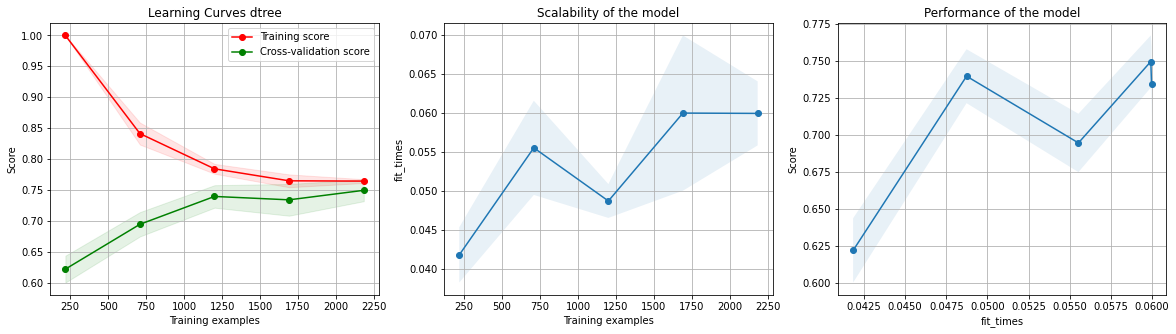

In [ ]:
plot_learning_curve(loaded_best_estimator_round4, 
                    'Learning Curves dtree', 
                    X_train, y_train, n_jobs=-1)

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [ ]:
#let's check the train scores
print(loaded_best_estimator_round4.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round4.best_score_)

0.7640161231220227
0.7493625029404847


**The perfromance is slightly beter than the pre-prunning trees** 

# <font color = 'pickle'>**Perfromnace on Test Data**

### <font color = 'pickle'>**Load saved Model**

In [ ]:
file_best_estimator_dtree = save_model_folder / 'dtree_round4_params.pkl'
best_estimator_dtree = joblib.load(file_best_estimator_dtree)

### <font color = 'pickle'>**Test Accuracy**

In [ ]:
#let's check the test scores for final model
print(f'Test data accauracy for round 4: {best_estimator_dtree.score(X_test,y_test)}')

Test data accauracy for round 4: 0.7561338289962826


### <font color = 'pickle'> **Confusion Matrix**

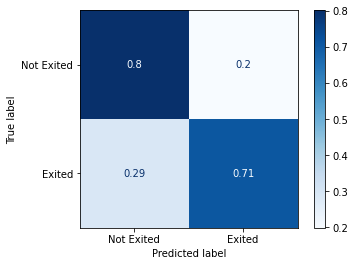

In [ ]:
ConfusionMatrixDisplay.from_estimator(best_estimator_dtree, X_test, y_test,
                                 display_labels=['Not Exited', 'Exited'],
                                 cmap=plt.cm.Blues,
                                 normalize = 'true')
plt.grid(False)
plt.show()